In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from bokeh.io import output_file, show, output_notebook
from bokeh.models import BasicTicker, ColorBar, ColumnDataSource, LinearColorMapper, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.transform import transform

In [2]:
def generate_heatmap(data, x_axis=None, y_axis=None, x_label='x label', y_label='y label', title="MapElites fitness map", minimization=True, notebook=False):
    # get data dimensionality
    d = data.shape
    
    # reshape data to obtain a 2d heatmap
    if len(d) == 2:
        data = data.transpose()
    if len(d) == 3:
        data = np.transpose(data, axes=(1, 0, 2)).reshape((d[1], d[0]*d[2]))
    if len(d) == 4:
        _data = np.transpose(data, axes=[1, 0, 2, 3])
        data = np.transpose(_data.reshape((d[1], d[0]*d[2], d[3])), axes=[0,2,1]).reshape((d[1]*d[3], d[0]*d[2]))
    
    plt.subplots(figsize=(20,15))
    
    x_axis = ['f', 'g', 'h', 'i']
    y_axis = ['a', 'b', 'c', 'd', 'z']
    if len(d) == 3:
        x_axis = np.repeat(x_axis, d[2])
    if len(d) == 4:
        x_axis = np.repeat(x_axis, d[2])
        y_axis = np.repeat(y_axis, d[3])
    
    df_data = pd.DataFrame(data, columns=[x_axis], index=[y_axis])
    df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    min = df_data.min().min()
    max = df_data.max().max()
    log_norm = LogNorm(vmin=min, vmax=max)
    cbar_ticks = [math.pow(10, i)
                  for i in range(math.floor(math.log10(min)), 1 + math.ceil(math.log10(max)))]
    
    mask = df_data.isnull()
    ax = sns.heatmap(
        df_data, 
        mask=mask, 
        annot=True,
        norm=log_norm,
        fmt=".1f",
        annot_kws={'size':10},
        cbar_kws={"ticks": cbar_ticks},
        linecolor='white'
    )
    
    ax.set_title(f"{title} - white cells are null values (not initialized)")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.invert_yaxis()
    
    # show grid lines
    if len(d) == 3:
        ax.vlines(list(range(0, d[1] * d[2], d[2])), *ax.get_ylim(), colors='g')
        ax.hlines(list(range(0, d[0])), *ax.get_xlim(), colors='g')
    if len(d) == 4:
        ax.hlines(list(range(0, d[1] * d[3], d[3])), *ax.get_xlim(), colors='g')
        ax.vlines(list(range(0, d[0] * d[2], d[2])), *ax.get_ylim(), colors='g')
    
    plt.show()
    

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]]


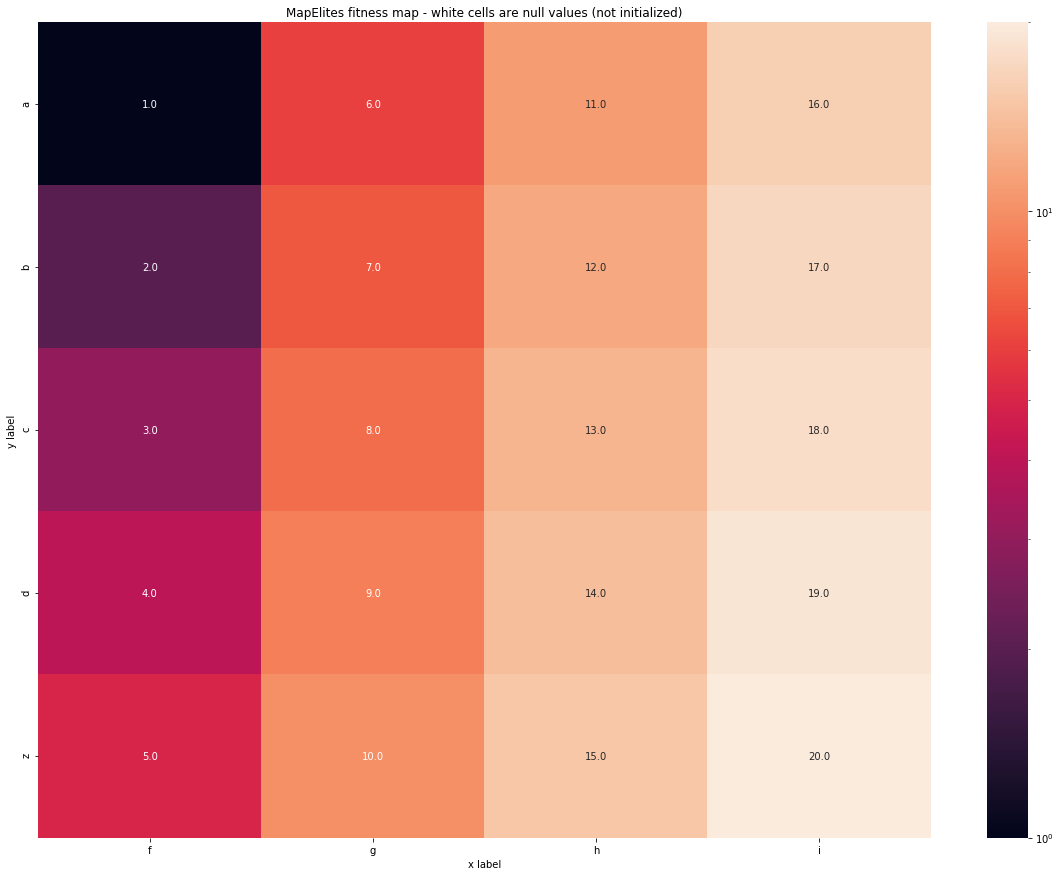

In [3]:
def test_2d():
    x_d = 4
    y_d = 5

    data = np.reshape(np.array(range(1, y_d*x_d+1)), (x_d, y_d))
    print(data)
    generate_heatmap(data)
test_2d()

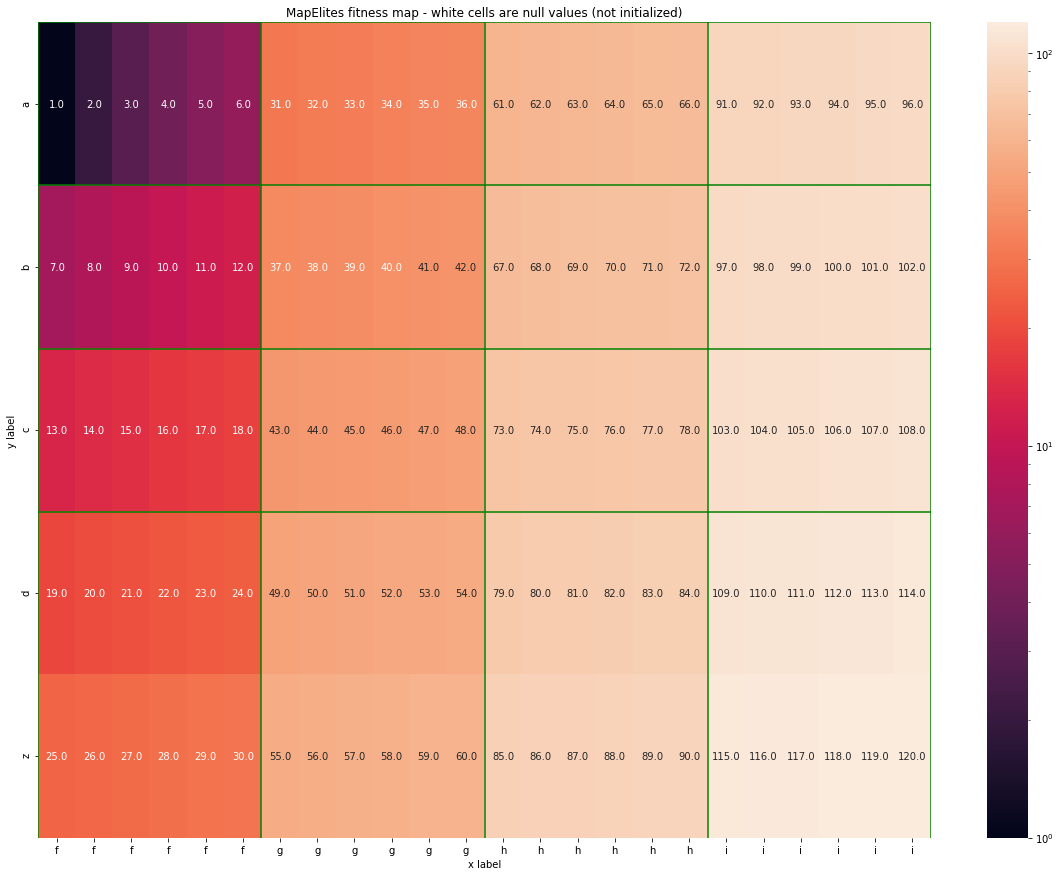

In [4]:
def test_3d():
    x_d = 4
    y_d = 5
    z_d = 6

    data = np.reshape(np.array(range(1, x_d*y_d*z_d+1)), (x_d, y_d, z_d))
    generate_heatmap(data)
test_3d()

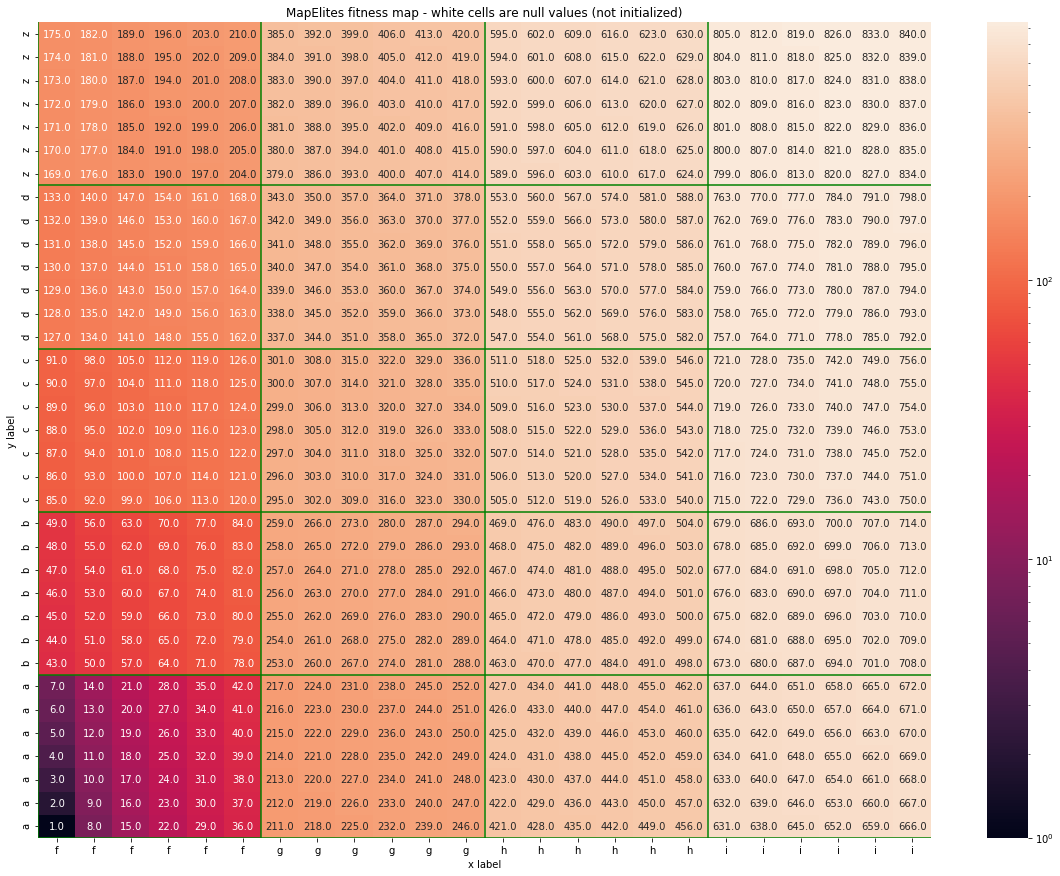

In [140]:
def test_4d():
    x_d = 4
    y_d = 5
    z_d = 6
    k_d = 7

    data = np.reshape(np.array(range(1, x_d*y_d*k_d*z_d+1)), (x_d, y_d, z_d, k_d))
    generate_heatmap(data)
test_4d()